# Visualizations - Pandas
## Pandas and matplotlib
You should now be able to control matplotlib charts quite well. Now see how to combine pandas with matplotib objects.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display, HTML

### Milan weather data
Let us begin with importing weather dataset.

A weather station from milano data sets:

https://dandelion.eu/datagems/SpazioDati/milano-weather-station-data/resource/
* 6045,Milano - via Filippo Juvara,45.473622,9.220392,Wind Direction,degree
* 5908,Milano - via Filippo Juvara,45.473622,9.220392,Precipitation,mm
* 6502,Milano - via Filippo Juvara,45.473622,9.220392,Atmospheric Pressure,hPa
* 6457,Milano - via Filippo Juvara,45.473622,9.220392,Net Radiation,W/m^2
* 5909,Milano - via Filippo Juvara,45.473622,9.220392,Temperature,Celsius degree
* 6179,Milano - via Filippo Juvara,45.473622,9.220392,Relative Humidity,%
* 6129,Milano - via Filippo Juvara,45.473622,9.220392,Wind Speed,m/s

In [2]:
sets = [
    ("6045", "windDirection"),
    ("5908", "precipitation"),
    ("6502", "pressure"),
    ("6457", "radiation"),
    ("5909", "temp"),
    ("6179", "humidity"),
    ("6129", "windSpeed"),
]

for i, oneSet in enumerate(sets):
    df = pd.read_csv("datasets/Milano_WeatherPhenomena/mi_meteo_"+oneSet[0]+".csv", names=["code", "date", oneSet[1]])
    print(df.shape)
#     df.set_index("date", inplace=True)
    df.drop("code", axis=1, inplace=True)
    if i == 0:
        milano = df
    else:
        # pandas sees there is only one common column to perform merge on (date)
        milano = milano.merge(df)
#     display(df.head())

(1434, 3)
(1447, 3)
(1447, 3)
(1447, 3)
(1447, 3)
(1447, 3)
(1447, 3)


In [3]:
milano.date = pd.to_datetime(milano.date)
display(milano.head())
print(milano.isnull().sum())
print(milano.dtypes)

,date,windDirection,precipitation,pressure,radiation,temp,humidity,windSpeed
0,2013-11-14 10:00:00,81,0.0,1002.2,36,12.9,69,1.9
1,2013-11-14 11:00:00,84,0.0,1002.0,51,12.9,68,2.1
2,2013-11-14 12:00:00,80,0.0,1001.0,64,12.9,68,2.5
3,2013-11-14 13:00:00,78,0.0,999.7,82,13.0,67,2.3
4,2013-11-14 14:00:00,80,0.0,998.8,53,13.1,66,2.2


date             0
windDirection    0
precipitation    0
pressure         0
radiation        0
temp             0
humidity         0
windSpeed        0
dtype: int64
date             datetime64[ns]
windDirection             int64
precipitation           float64
pressure                float64
radiation                 int64
temp                    float64
humidity                  int64
windSpeed               float64
dtype: object


Create columns which tell us something useful about the date.

In [4]:
milano["month"] = milano.date.dt.month
milano["weekday"] = milano.date.dt.weekday_name
milano["hour"] = milano.date.dt.hour

See how hourly temperatures change from November to December.

In [5]:
monthDay = milano.groupby(["month", "hour"]).agg("mean")
# monthDay.plot()

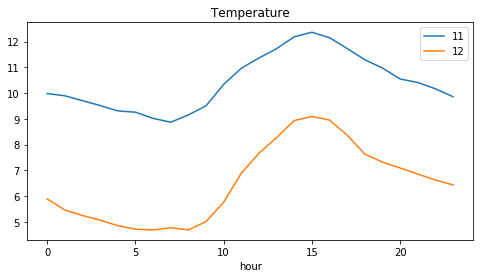

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(8,4))

for month in monthDay.index.get_level_values("month").unique():
    monthDay["temp"].loc[month].plot(ax=ax, label=month)
ax.set_title("Temperature")
ax.legend()
plt.show()

It seems that December is considerably colder. How does wind speed and humidity change? Assume that these indicators are less important and you want them to take less space on the chart.

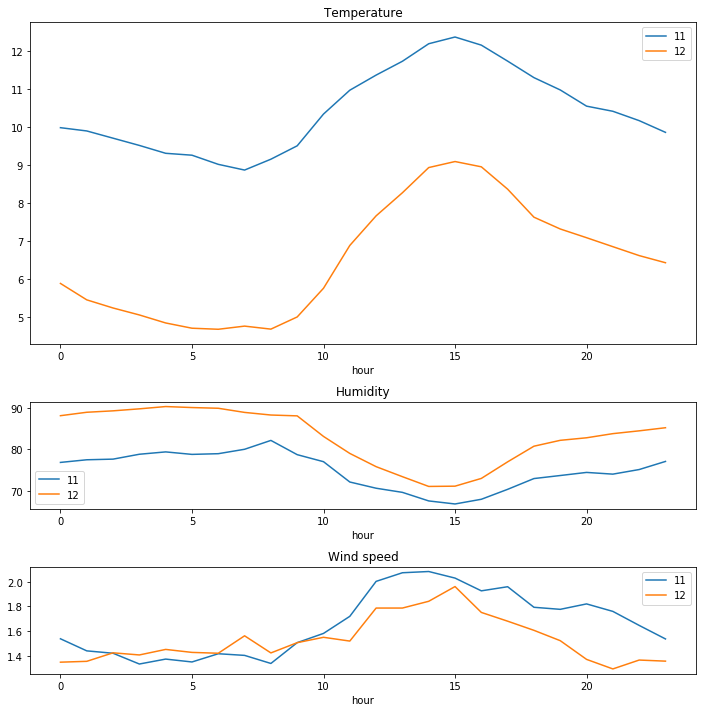

In [8]:
fig, ax = plt.subplots(3, 1, figsize=(10,10), gridspec_kw={'height_ratios':[3, 1, 1]})


for month in monthDay.index.get_level_values("month").unique():
    monthDay["temp"].loc[month].plot(ax=ax[0], label=month)
ax[0].legend()
ax[0].set_title("Temperature")
                                                         
for month in monthDay.index.get_level_values("month").unique():
    monthDay["humidity"].loc[month].plot(ax=ax[1], label=month)
ax[1].legend()
ax[1].set_title("Humidity")

for month in monthDay.index.get_level_values("month").unique():
    monthDay["windSpeed"].loc[month].plot(ax=ax[2], label=month)
ax[2].legend()
ax[2].set_title("Wind speed")
plt.tight_layout()                    
plt.show()
                 

You may also want to compare humidity and temperature on one chart.

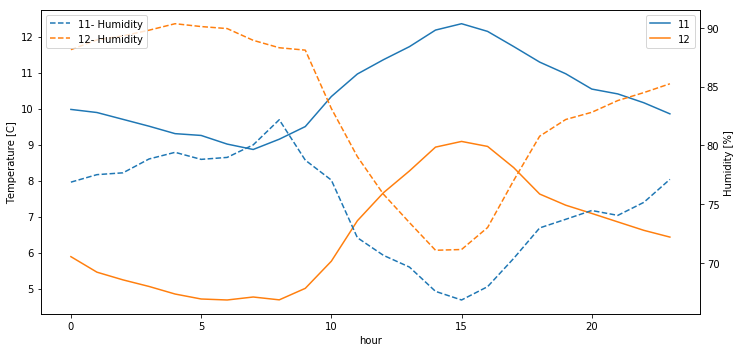

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(10,5))
ax1 = ax.twinx()

for month in monthDay.index.get_level_values("month").unique():
    monthDay["temp"].loc[month].plot(ax=ax, label=month)
ax.legend()
# ax[0].set_title("Temperature")
                                                         
for month in monthDay.index.get_level_values("month").unique():
    monthDay["humidity"].loc[month].plot(ax=ax1, label=str(str(month)+str("- Humidity")), style="--")
ax1.legend(loc=2)
fig.tight_layout()

ax.set_ylabel('Temperature [C]')
ax1.set_ylabel('Humidity [%]')
ax1.set_xlabel('Hour')

# ax[1].set_title("Humidity")

# t = np.linspace(0., 10., 100)
# ax1.plot(t, t ** 2, 'b-')
# ax2.plot(t, 1000 / (t + 1), 'r-')
# ax1.set_ylabel('Density (cgs)', color='red')
# ax1.set_ylabel('Temperature (K)', color='blue')
# ax1.set_xlabel('Time (s)')

### Airport and air routes data
Now you will use a well-known and interesting dataset about airports and air routes.
* https://openflights.org/data.html

As usual, let us begin with reading the dataset, checking its shape and column types, which we improve if necessary. We will also get rid of unnecessary columns.

In [10]:
cols = ['airportID', 'name', 'city', 'country', 'IATA', 'ICAO', 'lat', 'lon', 'altitude', 'timezone', 'DST', 'tz', 'type', 'source']
airports = pd.read_csv("datasets/air/airports.bin",sep=',',names=cols, dtype={'airportID':np.object})
cols = ['airportID', 'name', 'city', 'country', 'IATA', 'ICAO', 'lat', 'lon', 'altitude', 'timezone', 'DST', 'tz']
airports = airports[cols]

cols = ['airline', 'airlineID', 'sourceAirport', 'sourceAirportID', 'destAirport', 'destAirportID', 'codeshare', 'stops', 'equipment']
routes = pd.read_csv("datasets/air/routes.bin",sep=',',names=cols)
cols = ['airline', 'airlineID', 'sourceAirport', 'sourceAirportID', 'destAirport', 'destAirportID', 'stops', 'equipment']
routes = routes[cols]

In [11]:
print("Airports", airports.shape, "Routes", routes.shape)
display(airports.head())
display(routes.head())
print(airports.dtypes)
print(routes.dtypes)

Airports (7184, 12) Routes (67663, 8)


,airportID,name,city,country,IATA,ICAO,lat,lon,altitude,timezone,DST,tz
0,1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.391998,5282,10,U,Pacific/Port_Moresby
1,2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789001,20,10,U,Pacific/Port_Moresby
2,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388,10,U,Pacific/Port_Moresby
3,4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10,U,Pacific/Port_Moresby
4,5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,146,10,U,Pacific/Port_Moresby


,airline,airlineID,sourceAirport,sourceAirportID,destAirport,destAirportID,stops,equipment
0,2B,410,AER,2965,KZN,2990,0,CR2
1,2B,410,ASF,2966,KZN,2990,0,CR2
2,2B,410,ASF,2966,MRV,2962,0,CR2
3,2B,410,CEK,2968,KZN,2990,0,CR2
4,2B,410,CEK,2968,OVB,4078,0,CR2


airportID     object
name          object
city          object
country       object
IATA          object
ICAO          object
lat          float64
lon          float64
altitude       int64
timezone      object
DST           object
tz            object
dtype: object
airline            object
airlineID          object
sourceAirport      object
sourceAirportID    object
destAirport        object
destAirportID      object
stops               int64
equipment          object
dtype: object


Just in case, check before merging how many routes are without a corresponding airport. For 67000 routes, 850 unknown airports is not that bad.

In [12]:
print((~routes.sourceAirportID.isin(airports.airportID)).sum())
print((~routes.sourceAirport.isin(airports.IATA)).sum())
print((~routes.destAirportID.isin(airports.airportID)).sum())
print((~routes.destAirport.isin(airports.IATA)).sum())

845
845
849
849


Now, merge on proper columns. Choose an "inner" option. In this case we do not care about routes with unidentified airport. Do a double merge, so that you know latitude and longitude of both departure and arrival.
* Why do we choose "inner" instead of "right"? What would be the shape of routAir dataframe if you choose "right"? Would it make sense?

In [13]:
routAir = routes.merge(airports, left_on="sourceAirportID", right_on="airportID", how="inner" )
routAir = routAir.merge(airports, left_on="destAirportID", right_on="airportID", how="left", suffixes=["", "_dest"])
print(routAir.shape)
display(routAir.head())

(66818, 32)


,airline,airlineID,sourceAirport,sourceAirportID,destAirport,destAirportID,stops,equipment,airportID,name,...,city_dest,country_dest,IATA_dest,ICAO_dest,lat_dest,lon_dest,altitude_dest,timezone_dest,DST_dest,tz_dest
0,2B,410,AER,2965,KZN,2990,0,CR2,2965,Sochi International Airport,...,Kazan,Russia,KZN,UWKD,55.606201,49.278702,411.0,3,N,Europe/Moscow
1,7J,9531,AER,2965,DYU,2979,0,735,2965,Sochi International Airport,...,Dushanbe,Tajikistan,DYU,UTDD,38.543301,68.824997,2575.0,5,U,Asia/Dushanbe
2,9U,1073,AER,2965,KIV,1735,0,EM2,2965,Sochi International Airport,...,Chisinau,Moldova,KIV,LUKK,46.927700,28.931000,399.0,2,E,Europe/Chisinau
3,B2,1478,AER,2965,MSQ,2954,0,735 CRJ,2965,Sochi International Airport,...,Minsk 2,Belarus,MSQ,UMMS,53.882500,28.030701,670.0,3,E,Europe/Minsk
4,HY,5281,AER,2965,TAS,2983,0,767,2965,Sochi International Airport,...,Tashkent,Uzbekistan,TAS,UTTT,41.257900,69.281197,1417.0,5,U,Asia/Samarkand


You may want to know the distance of the routes. They are not available directly in the dataset, but fortunately we have geographical coordinates of both airports (disregard stopovers).
geopy library will be useful in this case.

In [14]:
from geopy.distance import vincenty

In [15]:
distances = []
for k,l,x,y in zip(routAir.lat, routAir.lon, routAir.lat_dest, routAir.lon_dest):
    try:
        distances.append(vincenty((x,y), (k,l)).meters/1000)
    except:
        distances.append(np.nan)
routAir["distance"] = distances

Choose only flights departing from European airports.

In [16]:
euro = routAir.loc[routAir.tz.str.contains("Europe")]
euro.shape

(19954, 33)

Count some interesting aggregate values.

In [17]:
euroAir = euro.groupby("airportID").agg({"airline":"count", "distance":"mean"})

In [18]:
euroAir["size"] = np.sqrt(euroAir.airline)
euroAir["sqrDistance"] = np.sqrt(euroAir.distance)

In [19]:
euroAir = euroAir.reset_index()

In [20]:
# there is only one common column, so Pandas guesses which one to use
euroAir = euroAir.merge(airports)


Now create a more interesting plot. Draw airports consideting their geographical coordinates, size of an airport (mean number of flights) and mean distance of flights.

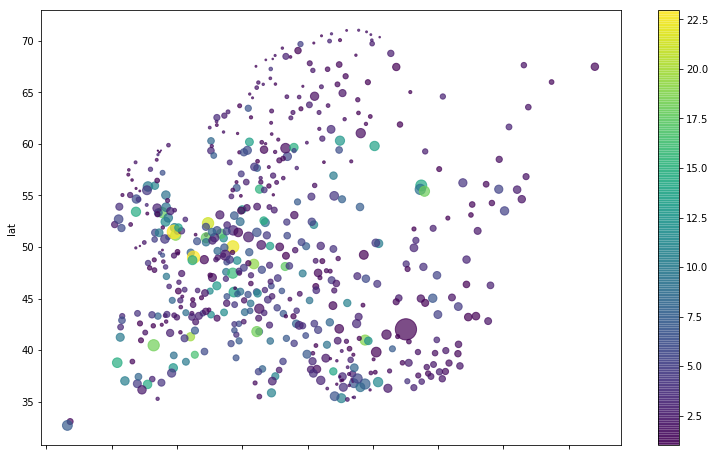

In [21]:
import matplotlib.cm as cmaps
euroAir.plot("lon", "lat", kind="scatter", figsize=(13,8), s=euroAir["distance"]/25, alpha=0.7, c=euroAir["size"], cmap=cmaps.viridis)

This chart may look pretty, but as long as coordinates are not exact and you do not see country borders, it is not that useful.

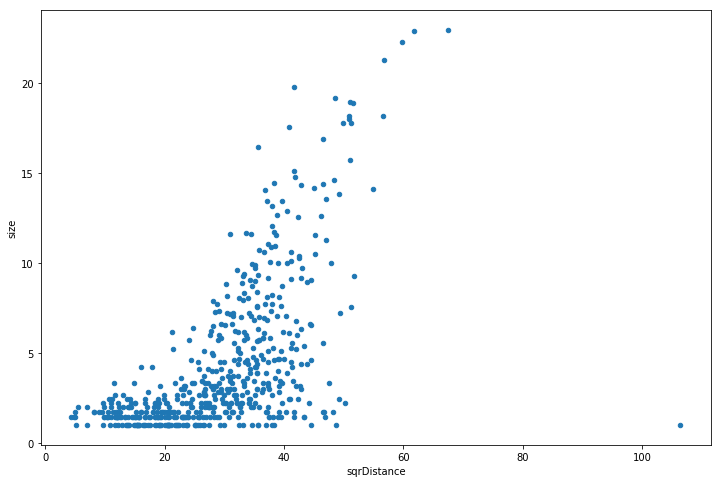

In [22]:
euroAir.plot("sqrDistance", "size", kind="scatter", figsize=(12,8))